In [31]:
# for measuring performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#for tuning parameters
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV
from eli5.sklearn import PermutationImportance


In [32]:
#for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.compose import ColumnTransformer as ct
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [33]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import gc
import random
from scipy.stats import uniform
import warnings

In [35]:
pd.options.display.max_columns = 150
# reading data from test 
test = pd.read_csv("../input/test.csv")
test.head(3)

train = pd.read_csv("../input/train.csv")
#train.head(3)

In [36]:
# for modeling estimators
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier as gbm
from sklearn.tree import  DecisionTreeClassifier as dt
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

In [37]:
# Summary of target feature
train['Target'].value_counts() 

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [38]:
#Label encoding 
train['dependency'].value_counts()
map1 = {'yes':0,'no':1}
map1
train['dependency'] = train['dependency'].replace(map1).astype(np.float32)

In [39]:
#Label encoding 
train['edjefa'].value_counts()
map3 = {'yes':0,'no':1}
map3
train['edjefa'] = train['edjefa'].replace(map3).astype(np.float32)

In [40]:
#Label encoding 
train['edjefe'].value_counts()
map2 = {'yes':0,'no':1}
map2
train['edjefe'] = train['edjefe'].replace(map2).astype(np.float32)

In [41]:
test['dependency'] = test['dependency'].map({"yes" : 1, "no" : 0})
test['edjefa'] = test['edjefa'].map({"yes" : 1, "no" : 0})
test['edjefe'] = test['edjefe'].map({"yes" : 1, "no" : 0})

In [42]:
#CLEANING DATA
#     Transform train and test dataframes
#     replacing '0' with NaN
train.replace(0, np.nan)
test.replace(0,np.nan)
#fillna() to replace missing values with the mean value for each column,

train.fillna(train.mean(), inplace=True);
print(train.isnull().sum());

train.shape

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
v18q1              0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
rez_esc            0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
                  ..
bedrooms           0
overcrowding       0
tipovivi1          0
tipovivi2          0
tipovivi3          0
tipovivi4          0
tipovivi5          0
computer           0
television         0
mobilephone        0
qmobilephone       0
lugar1             0
lugar2             0
lugar3             0
lugar4             0
lugar5             0
lugar6       

(9557, 143)

In [43]:
test.fillna(test.mean(), inplace=True);
print(test.isnull().sum());

test.shape

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
v18q1              0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
rez_esc            0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
                  ..
instlevel9         0
bedrooms           0
overcrowding       0
tipovivi1          0
tipovivi2          0
tipovivi3          0
tipovivi4          0
tipovivi5          0
computer           0
television         0
mobilephone        0
qmobilephone       0
lugar1             0
lugar2             0
lugar3             0
lugar4             0
lugar5       

(23856, 142)

In [44]:
#Explore Data
#Check dimenstions, column names and data types. 
def getDetails(data):
    print(f"Data shape: {data.shape}")
    print(f"Data columns: {data.columns}")
    print(f"Data types: {data.dtypes}")

getDetails(train)

Data shape: (9557, 143)
Data columns: Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)
Data types: Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
pa

In [45]:
getDetails (test)

Data shape: (23856, 142)
Data columns: Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=142)
Data types: Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int

In [ ]:
Dropping unnecesary columns

In [46]:
ID=test['Id']

train.drop(['Id','idhogar'], inplace = True, axis =1)

test.drop(['Id','idhogar'], inplace = True, axis =1)

In [ ]:
Perform data visualisation

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


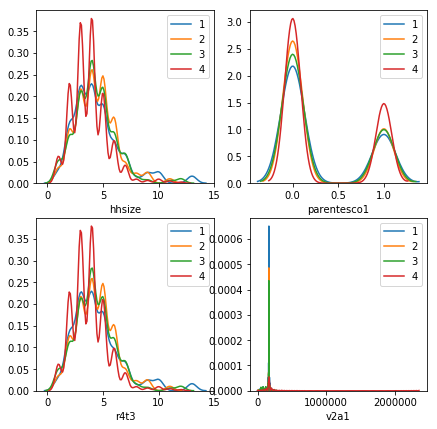

In [47]:
#Relationship of continous variable with the target--Density plots
import seaborn as sns
target_values = [1,2,3,4]

f, axes = plt.subplots(2, 2, figsize=(7, 7))
for target in target_values:
    # Subset as per target--first 1 , 2 , 3 and then 4
    subset = train[train['Target'] == target]

 # Draw the density plot
    sns.distplot(subset['hhsize'], hist = False, kde = True,
                  label = target, ax = axes[0,0])
    sns.distplot(subset['parentesco1'], hist = False, kde = True,
                  label = target, ax = axes[0,1])
    sns.distplot(subset['r4t3'], hist = False, kde = True,
                  label = target, ax = axes[1,0])
    sns.distplot(subset['v2a1'], hist = False, kde = True,
                  label = target, ax = axes[1,1])
    
plt.show()

In [30]:
Feature-Target Relationships

SyntaxError: invalid syntax (<ipython-input-30-9aa5848b9a5e>, line 1)

The next important relationship to explore is that of each attribute to the "Target" attribute.

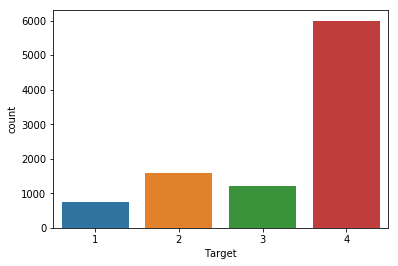

In [48]:
sns.countplot("Target", data=train)

In [ ]:
Feature-Feature Relationships The final important relationship to explore is that of the relationships between the attributes.

We can review the relationships between attributes by looking at the distribution of the interactions of each pair of attributes.

This uses a built function to create a matrix of scatter plots of all attributes versus all attributes. The diagonal where each attribute would be plotted against itself shows the Kernel Density Estimation of the attribute instead.

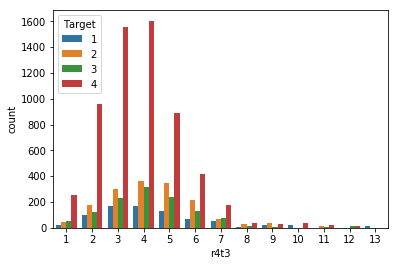

In [49]:
sns.countplot(x="r4t3",hue="Target",data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faaebd6c6a0>,
      dtype=object)

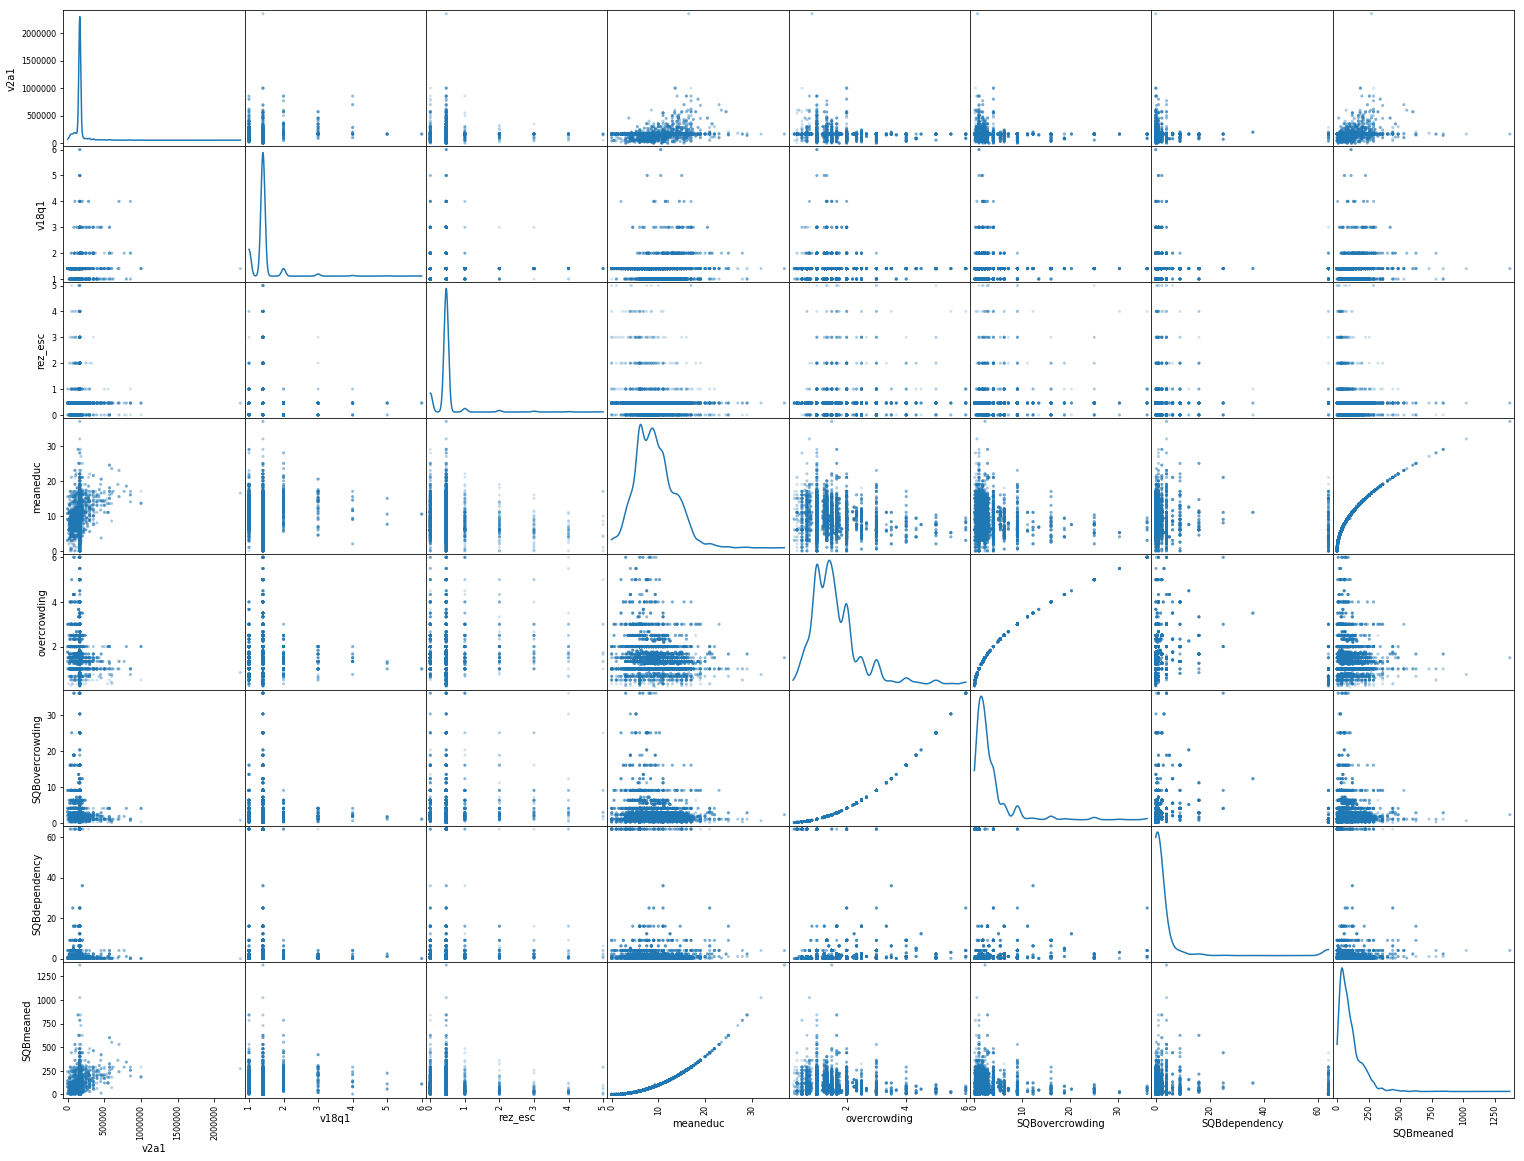

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(train.select_dtypes('float'), alpha=0.2, figsize=(26, 20), diagonal='kde')

In [ ]:
The below are Distribution plots using seaborn

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


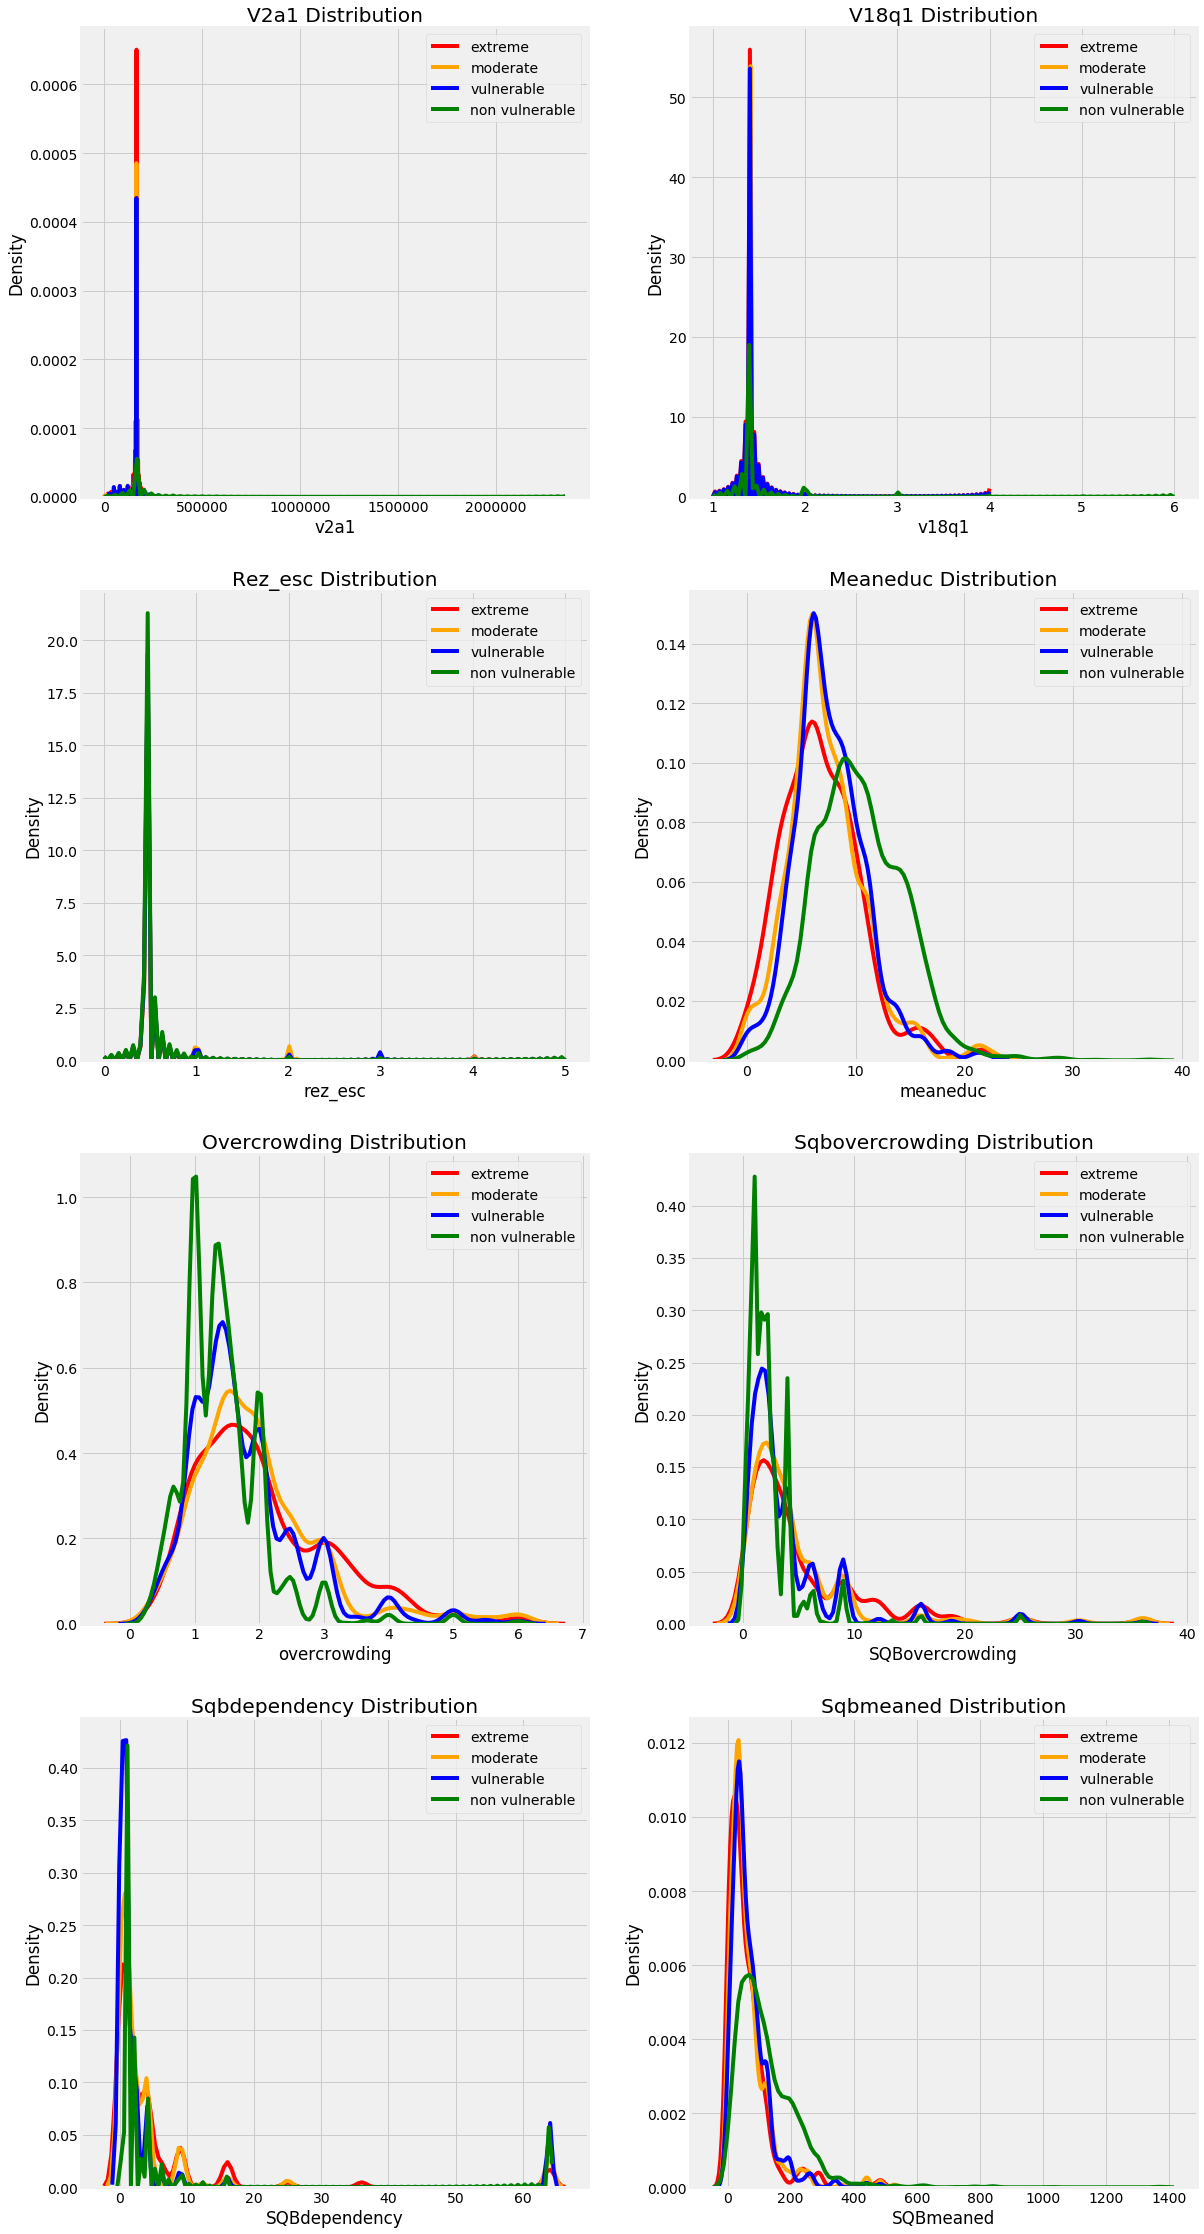

In [51]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

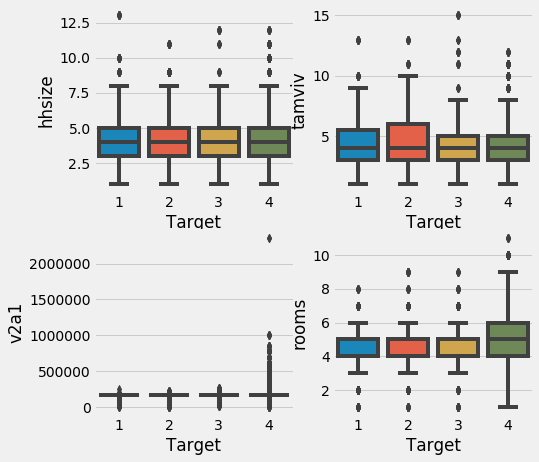

In [52]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.boxplot(x="Target", y="hhsize", data=train, ax=axes[0, 0])# size of the house hold 
sns.boxplot(x="Target", y="tamviv", data=train, ax=axes[0, 1])# number of person living in the household
sns.boxplot(x="Target", y="v2a1", data=train, ax=axes[1, 0])# monthly rent payment
sns.boxplot(x="Target", y="rooms", data=train, ax=axes[1, 1])#no of rooms in the house 
plt.show()

In [53]:
y = train.iloc[:,140]
y.unique()

array([4, 2, 3, 1])

In [54]:
X = train.iloc[:,1:141]
X.shape

(9557, 140)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size = 0.2)

In [56]:
#X_train.shape #((7645, 140)
#X_test.shape #(1912, 140)
#y_train.shape #(7645,)
y_test.shape #(1912,)

(1912,)

In [ ]:
Model 1 : Modelling with XGBoosterClassifier

In [57]:
modelxgb=XGBClassifier()

In [58]:
start = time.time()
modelgbm = modelxgb.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.18353326320648194

In [60]:
classes = modelgbm.predict(X_test)

classes

array([1, 4, 4, ..., 2, 4, 4])

In [61]:
(classes == y_test).sum()/y_test.size 

1.0

In [62]:
f1 = f1_score(y_test, classes, average='macro')
f1

1.0

In [63]:
modelxgb.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])

In [64]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    XGBClassifier(
       n_jobs = 2         # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
       #'criterion': ['gini'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
       # 'max_features' : (10,64),             # integer-valued parameter
        #'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [65]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'max_depth': (4, 100)},
       verbose=0)

In [68]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'max_depth': 20, 'n_estimators': 120}

In [70]:
modelxgbTuned=XGBClassifier(criterion="gini",
               max_depth=85,
               max_features=47,
               min_weight_fraction_leaf=0.035997,
               n_estimators=178)

In [71]:
start = time.time()
modelxgbTuned = modelxgbTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.2989867130915324

In [72]:
bayes_cv_tuner.best_score_

1.0

In [73]:
bayes_cv_tuner.score(X_test, y_test)

1.0

In [74]:
bayes_cv_tuner.cv_results_['params']

[{'max_depth': 20, 'n_estimators': 120},
 {'max_depth': 28, 'n_estimators': 124},
 {'max_depth': 87, 'n_estimators': 173},
 {'max_depth': 55, 'n_estimators': 446},
 {'max_depth': 22, 'n_estimators': 109},
 {'max_depth': 6, 'n_estimators': 141},
 {'max_depth': 7, 'n_estimators': 291},
 {'max_depth': 19, 'n_estimators': 407},
 {'max_depth': 15, 'n_estimators': 319},
 {'max_depth': 47, 'n_estimators': 418},
 {'max_depth': 100, 'n_estimators': 498},
 {'max_depth': 100, 'n_estimators': 493},
 {'max_depth': 100, 'n_estimators': 109},
 {'max_depth': 99, 'n_estimators': 499},
 {'max_depth': 99, 'n_estimators': 100},
 {'max_depth': 4, 'n_estimators': 491},
 {'max_depth': 100, 'n_estimators': 100},
 {'max_depth': 4, 'n_estimators': 497},
 {'max_depth': 98, 'n_estimators': 500},
 {'max_depth': 5, 'n_estimators': 104},
 {'max_depth': 100, 'n_estimators': 102},
 {'max_depth': 4, 'n_estimators': 500},
 {'max_depth': 100, 'n_estimators': 500},
 {'max_depth': 4, 'n_estimators': 100},
 {'max_depth': 10

In [ ]:
Model 2 : Random Forest

In [76]:
modelrf = rf()

In [77]:
start = time.time()
modelrf = modelrf.fit(X_train, y_train)
end = time.time()
(end-start)/60

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.002415815989176432

In [78]:
classes = modelrf.predict(X_test)
(classes == y_test).sum()/y_test.size 

0.9743723849372385

In [79]:
f1 = f1_score(y_test, classes, average='macro')
f1 

0.94945943354563

Performing tuning using Bayesian Optimization.

In [80]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    rf(
       n_jobs = 2         # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
        'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [81]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [82]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 56,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [83]:
bayes_cv_tuner.best_score_

1.0

In [84]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [85]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'entropy',
  'max_depth': 58,
  'max_features': 18,
  'min_weight_fraction_leaf': 0.47135968937035033,
  'n_estimators': 281},
 {'criterion': 'entropy',
  'max_depth': 50,
  'max_features': 19,
  'min_weight_fraction_leaf': 0.38887438908417743,
  'n_estimators': 491},
 {'criterion': 'entropy',
  'max_depth': 86,
  'max_features': 22,
  'min_weight_fraction_leaf': 0.476840971714569,
  'n_estimators': 474},
 {'criterion': 'gini',
  'max_depth': 88,
  'max_features': 18,
  'min_weight_fraction_leaf': 0.37630517928579943,
  'n_estimators': 400},
 {'criterion': 'entropy',
  'max_depth': 43,
  'max_features': 40,
  'min_weight_fraction_leaf': 0.401976574132438,
  'n_estimators': 407},
 {'criterion': 'gini',
  'max_depth': 91,
  'max_features': 22,
  'min_weight_fraction_leaf': 0.39750589842993883,
  'n_estimators': 437},
 {'criterion': 'gini',
  'max_depth': 39,
  'max_features': 64,
  'min_weight_fraction_leaf': 0.19696463395680502,
  'n_estimators': 247},
 {'criterion': 'ent

In [86]:
modelrfTuned=rf(criterion="gini",
               max_depth=88,
               max_features=41,
               min_weight_fraction_leaf=0.1,
               n_estimators=285)

In [87]:
start = time.time()
modelrfTuned = modelrfTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.047855250040690106

In [88]:
rf_predict=modelrfTuned.predict(X_test)
rf_predict

array([4, 4, 4, ..., 2, 4, 4])

In [89]:
scale = ss()
test = scale.fit_transform(test)
rf_predict_test=modelrfTuned.predict(test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Modelling with KNeighborsClassifier

In [90]:
modelKN = KNeighborsClassifier(n_neighbors=7)

In [91]:
start = time.time()
modelKN = modelKN.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.0010679761568705242

In [92]:
classes = modelKN.predict(X_test)
classes

array([4, 4, 4, ..., 4, 4, 4])

In [93]:
(classes == y_test).sum()/y_test.size 

0.5878661087866108

Performing tuning using Bayesian Optimization.

In [94]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    KNeighborsClassifier(
       n_neighbors=7         # No need to tune this parameter value
      ),
    {"metric": ["euclidean", "cityblock"]},
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

In [95]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimize

/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimize

/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimize

BayesSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'metric': ['euclidean', 'cityblock']}, verbose=0)

In [96]:
bayes_cv_tuner.best_params_

{'metric': 'cityblock'}

In [98]:
modelKNTuned = KNeighborsClassifier(n_neighbors=7, metric="cityblock")

In [99]:
start = time.time()
modelKNTuned = modelKNTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.0010233163833618165

In [101]:
yneigh=modelKNTuned.predict(X_test)

In [102]:
yneightest=modelKNTuned.predict(test)

In [103]:
bayes_cv_tuner.best_score_

0.6150425114453891

In [104]:
bayes_cv_tuner.score(X_test, y_test)

0.6155857740585774

In [105]:
bayes_cv_tuner.cv_results_['params']

[{'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'euclidean'},
 {'metric': 'euclidean'},
 {'metric': 'cityblock'},
 {'metric': 'euclidean'},
 {'metric': 'euclidean'},
 {'metric': 'cityblock'},
 {'metric': 'euclidean'},
 {'metric': 'euclidean'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'},
 {'metric': 'cityblock'}]

Modelling with ExtraTreeClassifier

In [106]:
modeleETClf = ExtraTreesClassifier()

In [107]:
start = time.time()
modeleETClf = modeleETClf.fit(X_train, y_train)
end = time.time()
(end-start)/60

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0028450886408487954

In [108]:
classes = modeleETClf.predict(X_test)
classes

array([1, 4, 4, ..., 2, 4, 4])

In [109]:
(classes == y_test).sum()/y_test.size

0.983786610878661

Performing tuning using Bayesian Optimization.

In [110]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    ExtraTreesClassifier( ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {   'n_estimators': (100, 500),           # Specify integer-values parameters like this
        'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
)

In [111]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=2, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [112]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'gini',
 'max_depth': 51,
 'max_features': 33,
 'min_weight_fraction_leaf': 0.000899469205421999,
 'n_estimators': 331}

In [113]:
modeletfTuned=ExtraTreesClassifier(criterion="gini",
               max_depth=100,
               max_features=64,
               min_weight_fraction_leaf=0.0,
               n_estimators=100)

In [114]:
start = time.time()
modeletfTuned = modeletfTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.03140576283137004

In [115]:
yetf=modeletfTuned.predict(X_test)
yetftest=modeletfTuned.predict(test)

In [116]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

1.0

In [117]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [118]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'gini',
  'max_depth': 29,
  'max_features': 31,
  'min_weight_fraction_leaf': 0.38505663711277466,
  'n_estimators': 292},
 {'criterion': 'gini',
  'max_depth': 44,
  'max_features': 16,
  'min_weight_fraction_leaf': 0.36554367601589133,
  'n_estimators': 126},
 {'criterion': 'entropy',
  'max_depth': 22,
  'max_features': 49,
  'min_weight_fraction_leaf': 0.062267201535365205,
  'n_estimators': 405},
 {'criterion': 'gini',
  'max_depth': 48,
  'max_features': 18,
  'min_weight_fraction_leaf': 0.010612412802761819,
  'n_estimators': 174},
 {'criterion': 'gini',
  'max_depth': 55,
  'max_features': 18,
  'min_weight_fraction_leaf': 0.12765278779353087,
  'n_estimators': 169},
 {'criterion': 'gini',
  'max_depth': 66,
  'max_features': 15,
  'min_weight_fraction_leaf': 0.47918638779193046,
  'n_estimators': 416},
 {'criterion': 'entropy',
  'max_depth': 97,
  'max_features': 41,
  'min_weight_fraction_leaf': 0.10494722349738442,
  'n_estimators': 225},
 {'criterion': 'ent

Modelling with Light Gradient Booster

In [119]:
modellgb = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.1, objective='multiclass',
                             random_state=None, silent=True, metric='None', 
                             n_jobs=4, n_estimators=5000, class_weight='balanced',
                             colsample_bytree =  0.93, min_child_samples = 95, num_leaves = 14, subsample = 0.96)

In [120]:
start = time.time()
modellgb = modellgb.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.290588637193044

In [121]:
classes = modellgb.predict(X_test)

classes

array([1, 4, 4, ..., 2, 4, 4])

In [122]:
(classes == y_test).sum()/y_test.size 

1.0

Performing tuning using Bayesian Optimization.

In [123]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    lgb.LGBMClassifier(
       n_jobs = 2         # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
        'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)


In [124]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=3, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=2, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [125]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'entropy',
 'max_depth': 58,
 'max_features': 61,
 'min_weight_fraction_leaf': 0.12280527238131636,
 'n_estimators': 449}

In [126]:
modellgbTuned = lgb.LGBMClassifier(criterion="entropy",
               max_depth=35,
               max_features=14,
               min_weight_fraction_leaf=0.18611,
               n_estimators=148)

In [127]:
start = time.time()
modellgbTuned = modellgbTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.02775553862253825

In [128]:
ylgb=modellgbTuned.predict(X_test)
ylgbtest=modellgbTuned.predict(test)

In [129]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_


1.0

In [130]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [131]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'entropy',
  'max_depth': 58,
  'max_features': 61,
  'min_weight_fraction_leaf': 0.12280527238131636,
  'n_estimators': 449},
 {'criterion': 'entropy',
  'max_depth': 9,
  'max_features': 33,
  'min_weight_fraction_leaf': 0.13145549672110626,
  'n_estimators': 120},
 {'criterion': 'entropy',
  'max_depth': 11,
  'max_features': 32,
  'min_weight_fraction_leaf': 0.43767347729946626,
  'n_estimators': 158},
 {'criterion': 'gini',
  'max_depth': 50,
  'max_features': 24,
  'min_weight_fraction_leaf': 0.2953657462500857,
  'n_estimators': 277},
 {'criterion': 'gini',
  'max_depth': 87,
  'max_features': 63,
  'min_weight_fraction_leaf': 0.4005445848986082,
  'n_estimators': 181},
 {'criterion': 'gini',
  'max_depth': 8,
  'max_features': 56,
  'min_weight_fraction_leaf': 0.27011022242777255,
  'n_estimators': 336},
 {'criterion': 'entropy',
  'max_depth': 49,
  'max_features': 17,
  'min_weight_fraction_leaf': 0.49202829786648,
  'n_estimators': 215},
 {'criterion': 'entrop

In [132]:
NewTrain = pd.DataFrame()

NewTrain['ylgb'] = ylgb.tolist()
NewTrain['yneigh'] = yneigh.tolist()
NewTrain['yetf'] = yetf.tolist()
NewTrain['rf_predict'] = rf_predict.tolist()


NewTrain.head(5), NewTrain.shape

(   ylgb  yneigh  yetf  rf_predict
 0     1       4     1           4
 1     4       4     4           4
 2     4       4     4           4
 3     4       4     4           4
 4     4       4     4           4, (1912, 4))

In [133]:
NewTest = pd.DataFrame()

NewTest['yetf'] = yetftest.tolist()
NewTest['yneigh'] = yneightest.tolist()
NewTest['ylgb'] = ylgbtest.tolist()
NewTest['rf_predict_test'] = rf_predict_test.tolist()


NewTest.head(5), NewTest.shape

(   yetf  yneigh  ylgb  rf_predict_test
 0     1       1     1                2
 1     1       1     1                2
 2     1       1     1                2
 3     1       1     1                2
 4     1       1     1                2, (23856, 4))

In [134]:
NewModel=rf(criterion="entropy",
               max_depth=77,
               max_features=3,
               min_weight_fraction_leaf=0.0,
               n_estimators=500)

In [135]:
start = time.time()
NewModel = NewModel.fit(NewTrain, y_test)
end = time.time()
(end-start)/60

0.009469095865885417

In [136]:
NewPredict=NewModel.predict(NewTest)


In [137]:
submit=pd.DataFrame({'Id': ID, 'Target': NewPredict})
submit.head(5)

,Id,Target
0,ID_2f6873615,1
1,ID_1c78846d2,1
2,ID_e5442cf6a,1
3,ID_a8db26a79,1
4,ID_a62966799,1


In [138]:
submit.to_csv('CostaRicaSubmit.csv', index=False)